## **Introduction**

While waiting for [_Star Wars: The Force Awakens_](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became interested in answering some questions about _Star Wars_ fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**


## **Dataset**

The team needed to collect data addressing this question. To do this, they surveyed _Star Wars_ fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including the following:

-   `RespondentID` — An anonymized ID for the respondent (person taking the survey)
-   `Gender` — the respondent's gender
-   `Age` — the respondent's age
-   `Household Income` — the respondent's income
-   `Education` — the respondent's education level
-   `Location (Census Region)` — the respondent's location
-   `Have you seen any of the 6 films in the Star Wars franchise?` — a `Yes` or `No` response
-   `Do you consider yourself to be a fan of the Star Wars film franchise?` — a `Yes` or `No` response

In [1]:
import pandas as pd

In [2]:
path = '../../../../08_Zadania_baza/DataScience/DataQuest/Guided Projects/Beginner/Star Wars Survey'

star_wars = pd.read_csv(f"{path}/star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

## **Cleaning**

There are several other columns containing answers to questions about the _Star Wars_ movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
No     284
Name: count, dtype: int64

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

### Missing values

In [9]:
def check_missing_values(dataset: pd.DataFrame):
    total = dataset.isnull().sum()
    total_percent = (dataset.isnull().mean() * 100).round(2)
    missing_data = pd.concat([total, total_percent], axis=1, keys=['Total', 'Percent'])

    print(missing_data)

df_with_two_questions = pd.DataFrame(
    {
        'Question1': star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'],
        'Question2': star_wars['Have you seen any of the 6 films in the Star Wars franchise?']
    }
)

check_missing_values(df_with_two_questions)

           Total  Percent
Question1    350    29.51
Question2      0     0.00


### Mapping Yes/No Columns

In [10]:
yes_no = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars = star_wars.astype({'Have you seen any of the 6 films in the Star Wars franchise?': 'bool', 
                              'Do you consider yourself to be a fan of the Star Wars film franchise?': 'bool'})

star_wars.dtypes


RespondentID                                                                                                                                       int64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                        bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                               bool
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

### Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

-   `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
-   `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
-   `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
-   `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
-   `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
-   `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.  

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [12]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
Name: count, dtype: int64

In [14]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

start_col = star_wars.columns.get_loc('Which of the following Star Wars films have you seen? Please select all that apply.')
end_col = star_wars.columns.get_loc('Unnamed: 8')

for col in star_wars.columns[start_col:end_col + 1]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [15]:
columns_name = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

star_wars = star_wars.rename(columns=columns_name)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,True,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning the Ranking Columns

The next six columns ask the respondent to rank the _Star Wars_ movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

-   `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
-   `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
-   `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
-   `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
-   `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
-   `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [18]:
start_col_rank = star_wars.columns.get_loc('Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.')
end_col_rank = star_wars.columns.get_loc('Unnamed: 14')

star_wars[star_wars.columns[start_col_rank:end_col_rank+1]] = star_wars[star_wars.columns[start_col_rank:end_col_rank+1]].astype(float)

In [19]:
ranking_names = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6" 
}

star_wars = star_wars.rename(columns=ranking_names)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

## Finding The Highest-Ranked Movie

In [23]:
star_wars.iloc[:, star_wars.columns.get_loc('ranking_1') :  star_wars.columns.get_loc('ranking_6')]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5
0,3.0,2.0,1.0,4.0,5.0
1,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0
3,5.0,6.0,1.0,2.0,4.0
4,5.0,4.0,6.0,2.0,1.0
...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0
1182,4.0,5.0,6.0,2.0,3.0
1183,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0


<Axes: xlabel='Column', ylabel='Mean'>

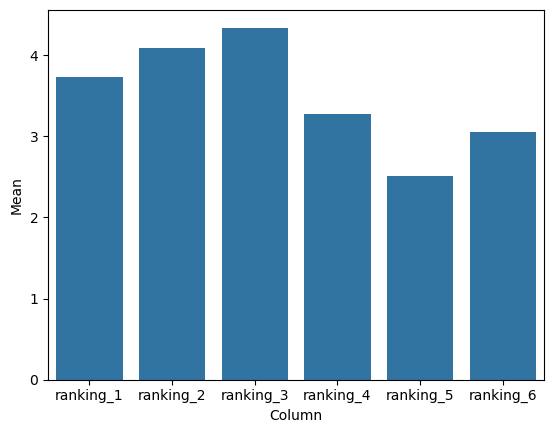

In [29]:
%matplotlib inline
import seaborn as sns


col = star_wars.iloc[:, 9:15].columns
means = star_wars.iloc[:, 9:15].mean()
means_df = means.reset_index()
means_df.columns = ['Column', 'Mean']

sns.barplot(data=means_df, x='Column', y='Mean')

## Finding the Most viewd Movie

In [30]:
sums = star_wars.iloc[:, 3:9].sum()
sums

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Axes: xlabel='Column', ylabel='Viewed'>

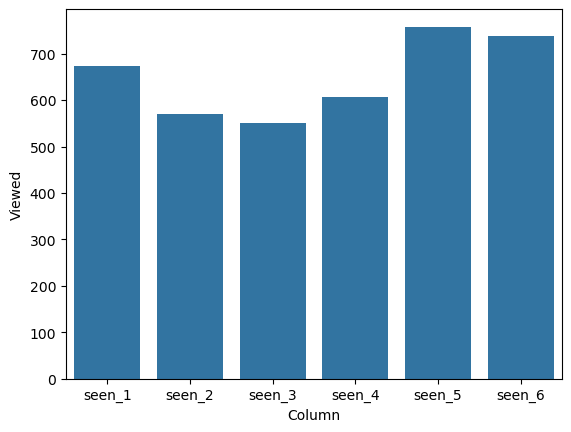

In [33]:
sums_df = sums.reset_index()
sums_df.columns = ['Column', 'Viewed']
sns.barplot(sums_df, x='Column', y='Viewed')

## Exploring the Data by Binary Segments

In [34]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

In [35]:
star_wars['Gender'].value_counts()

Gender
Female    549
Male      497
Name: count, dtype: int64

In [37]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
males

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,True,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,3288429390,False,True,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,West South Central
1157,3288423088,False,True,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Male,45-60,"$100,000 - $149,999",Graduate degree,Middle Atlantic
1164,3288415166,True,False,True,True,True,False,True,True,5.0,...,Neither favorably nor unfavorably (neutral),Han,No,NaN,No,Male,45-60,"$100,000 - $149,999",Graduate degree,Middle Atlantic
1169,3288408698,True,True,True,False,False,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,45-60,"$25,000 - $49,999",Bachelor degree,South Atlantic


<Axes: xlabel='Gender', ylabel='Mean'>

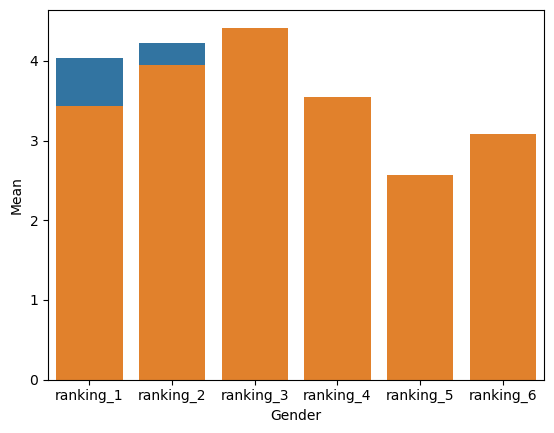

In [38]:
males_df = males.iloc[:, 9:15].mean().reset_index()
males_df.columns = ['Gender', 'Mean']
females_df = females.iloc[:, 9:15].mean().reset_index()
females_df.columns = ['Gender', 'Mean']

sns.barplot(data=males_df, x='Gender', y='Mean', legend=True)
sns.barplot(data=females_df, x='Gender', y='Mean', legend=True)

<Axes: xlabel='Gender', ylabel='Sum'>

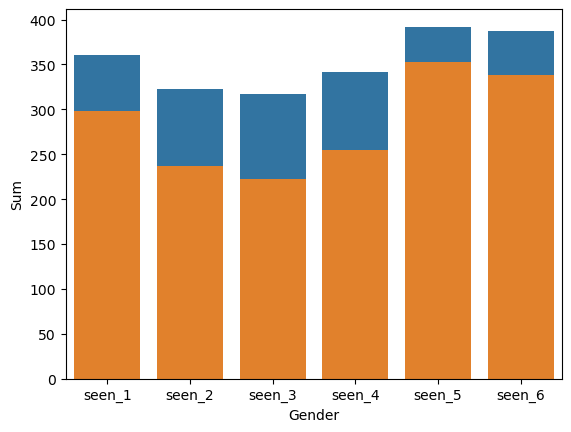

In [39]:
males_df_sum = males.iloc[:, 3:9].sum().reset_index()
males_df_sum.columns = ['Gender', 'Sum']
females_df_sum = females.iloc[:, 3:9].sum().reset_index()
females_df_sum.columns = ['Gender', 'Sum']

sns.barplot(data=males_df_sum, x='Gender', y='Sum')
sns.barplot(data=females_df_sum, x='Gender', y='Sum')